In [2]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn 

from sklearn import datasets, linear_model, metrics, tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import ElasticNet, Lasso,  RidgeCV

from sklearn.neighbors import KNeighborsRegressor

        
# Dataset splitting        
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV

# Errors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib

In [3]:
df_dia = pd.read_csv("dataset_scaled_diameter.csv")
df_dia

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0            1             1               1                 1   
1           11            11              11                11   
2           15            15              15                15   
3           16            16              16                16   
4           19            19              19                19   
..         ...           ...             ...               ...   
66         207           211             211               211   
67         208           212             212               212   
68         209           213             213               213   
69         210           214             214               214   
70         214           218             218               218   

    in_amount_mmol  p_amount_mmol  ligand_amount_mmol  first_sol_amount_ml  \
0         0.195883       0.280681           -0.439228            -0.658075   
1        -0.299814      -0.011188           -0.439228            -0.589501   
2        -0.423738       0.134746           -0.439228            -0.425463   
3        -0.423738       0.134746           -0.439228            -0.425463   
4        -0.588970       1.448160           -0.323906            -0.535648   
..             ...            ...                 ...                  ...   
66       -0.093273      -0.485476            0.368027             2.081234   
67        1.806899       0.353649            3.020436             2.425560   
68        7.590031       6.555877           -0.439228             2.769887   
69        0.154575      -0.376755            0.713993             4.491519   
70        2.633061       0.718486            4.173657             6.213152   

    second_sol_amount_ml  third_sol_amount_ml  ...  x6_zinc undecylenate  \
0              -0.370637            -0.096002  ...                     0   
1              -0.370637            -0.096002  ...                     0   
2               0.314284            -0.096002  ...                     0   
3               0.314284            -0.096002  ...                     0   
4              -0.370637            -0.096002  ...                     0   
..                   ...                  ...  ...                   ...   
66             -0.370637            -0.096002  ...                     0   
67              1.097051            -0.096002  ...                     0   
68              9.413951            -0.096002  ...                     0   
69             -0.370637            -0.096002  ...                     0   
70              4.521657            -0.096002  ...                     0   

    x7_None  x7_copper bromide  x7_oleic acid  x7_water  x7_zinc iodide  \
0         1                  0              0         0               0   
1         1                  0              0         0               0   
2         1                  0              0         0               0   
3         1                  0              0         0               0   
4         1                  0              0         0               0   
..      ...                ...            ...       ...             ...   
66        1                  0              0         0               0   
67        1                  0              0         0               0   
68        1                  0              0         0               0   
69        1                  0              0         0               0   
70        1                  0              0         0               0   

    diameter_nm  abs_nm  emission_nm  Unnamed: 81  
0          2.61   610.0        688.5         78.5  
1          1.70   480.0        518.0         38.0  
2          3.60   492.0        546.5         54.5  
3          4.60   611.0        634.0         23.0  
4          2.50   601.0        695.0         94.0  
..          ...     ...          ...          ...  
66         2.70   532.0        591.0         59.0  
67         2.40   560.0        603.5        

In [4]:
# Input for ML models

input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 'x5_None', 'x5_trioctylphosphine',
       'x6_None', 'x6_acetic acid', 'x6_superhydride',
       'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide',
       'x6_zinc chloride', 'x6_zinc iodide', 'x6_zinc octanoate',
       'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 'x7_None',
       'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide',
        'abs_nm','emission_nm'
        ]

output_col = ['diameter_nm']

X = df_dia[input_col]

Y = df_dia[output_col]

In [5]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [6]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 50, 5):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [01:11<00:00,  3.59s/it]

0.1897979797979798 13 3 10


In [12]:
min_mae = 99999

min_a  = 0

for a in tqdm(range(1, 70)):
    B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=13),
                                      n_estimators=3,
                                      random_state=a)
    B_regr.fit(X_train, np.ravel(Y_train))
            
    B_Y_pred = B_regr.predict(X_test)
            
    mae = mean_absolute_error(Y_test, B_Y_pred)
            
    if (min_mae > mae):
        min_mae = mae
        min_a = a
                
print(min_mae, min_a)

100%|██████████| 69/69 [00:00<00:00, 103.57it/s]

0.1897979797979798 10


### 2. Decision Trees

In [7]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [00:33<00:00,  1.67s/it]

0.2638076416337285 10 19 70


### 3. Random Forrest 

In [8]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [03:11<00:00,  9.57s/it]

0.23323138251310513 7 11 44


Mean absolute error = 0.247 
 0.173


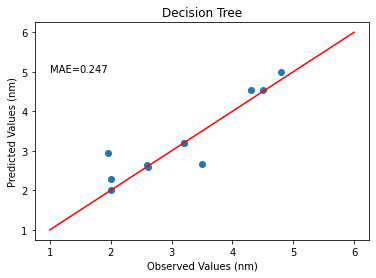

In [13]:
RF_regr = RandomForestRegressor(max_depth=10, 
                                n_estimators=2, 
                                max_features=42,
                                random_state=45)
            
RF_regr.fit(X_train, np.ravel(Y_train))
            
RF_Y_pred = RF_regr.predict(X_test)
            
RF_mae = mean_absolute_error(Y_test, RF_Y_pred)
RF_mse = mean_squared_error(Y_test, RF_Y_pred)
print("Mean absolute error =", round(RF_mae,3), '\n', round(RF_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, RF_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([1,6],[1,6], color = 'r')
plt.text(1, 5, 'MAE=' , fontdict=None)
plt.text(1.49, 5, round(RF_mae,3) , fontdict=None)
plt.show()

### 4. Extra Trees

In [9]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 60, 2):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:44<00:00,  8.21s/it]

0.2681818181818182 6 1 18


### 5. Gradient Boosting

In [10]:
min_mae = 999
min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
for i in tqdm(range(300, 400, 10)):
    for j in range(2, 40, 2):
        for k in np.arange(0.04, 0.22, 0.02):
            for l in range(2, 10, 2):
                GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
                GB_regr.fit(X_train, np.ravel(Y_train))
                GB_Y_pred = GB_regr.predict(X_test)

                mae = mean_absolute_error(Y_test, GB_Y_pred)
                if (min_mae > mae):
                    min_mae = mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(min_mae, min_i, min_j, min_k, min_l)

 10%|█         | 1/10 [02:47<25:08, 167.65s/it]


KeyboardInterrupt: 

### 6. Others

In [14]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  0.7563636363636366 

Ridge
 MAE for diameter is  0.6253231781201205 

Lasso
 MAE for diameter is  0.6448976800902813 

ElasticNet
 MAE for diameter is  0.6564879495126625 



### Conclusion

Bagging has the best performance

In [13]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=13),
                                      n_estimators=3,
                                      random_state=10)
            

B_regr.fit(X_train, np.ravel(Y_train))
B_Y_pred = B_regr.predict(X_test)

joblib.dump(B_regr, "./model_aug_diameter_Bagging.joblib")

['./model_aug_diameter_Bagging.joblib']